# 1)Exploring The Dataset

## 1.1)Import Libraries

In [1]:
import os
os.environ['KERAS_BACKEND']='tensorflow'

# Ignore warnings :
import warnings
warnings.filterwarnings('ignore')


# Handle table-like data and matrices :
import numpy as np
import pandas as pd
import math 
import itertools

# Modelling Algorithms :

# Classification
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier , GradientBoostingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis , QuadraticDiscriminantAnalysis


# Modelling Helpers :
from sklearn.preprocessing import Normalizer , scale
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.feature_selection import RFECV
from sklearn.model_selection import GridSearchCV , KFold , cross_val_score


#preprocessing :
from sklearn.preprocessing import MinMaxScaler , StandardScaler, LabelEncoder



#evaluation metrics :

# Regression
from sklearn.metrics import mean_squared_log_error,mean_squared_error, r2_score,mean_absolute_error 

# Classification
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score  


# Deep Learning Libraries
from keras.models import Sequential, load_model
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from keras.optimizers import Adam,SGD,Adagrad,Adadelta,RMSprop
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau, LearningRateScheduler
from keras.utils import to_categorical



# Visualisation
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns



# Configure visualisations
%matplotlib inline
mpl.style.use( 'ggplot' )
plt.style.use('fivethirtyeight')
sns.set(context="notebook", palette="dark", style = 'whitegrid' , color_codes=True)

Using TensorFlow backend.


## 1.2)Extract Dataset

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('testX.csv')
df = train.copy()
df_test = test.copy()

In [3]:
df.head()

,Id,Label,1,2,3,4,5,6,7,8,...,775,776,777,778,779,780,781,782,783,784
0,10000,4,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,10001,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,10002,0,0,0,0,0,0,0,0,0,...,31,9,0,0,0,0,0,0,0,0
3,10003,4,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,10004,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
df_test.head()

,Id,0,1,2,3,4,5,6,7,8,...,774,775,776,777,778,779,780,781,782,783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,1,0,0,0,...,119,114,130,76,0,0,0,0,0,0
2,2,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,3,0,0,0,0,0,0,0,0,33,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## 1.3)Examine Dimensions

In [5]:
print('Train: ', df.shape)
print('Test: ', df_test.shape)

Train:  (60000, 786)
Test:  (10000, 785)


In [6]:
df["Label"].unique()

array([4, 0, 1, 2, 3], dtype=int64)

## 1.4)Examine NaN Values

In [7]:
# Train
df.isnull().any().sum()

0

In [8]:
# Test
df_test.isnull().any().sum()

0

# 2)Visualizing the Dataset

## 2.1) Plotting Random Images

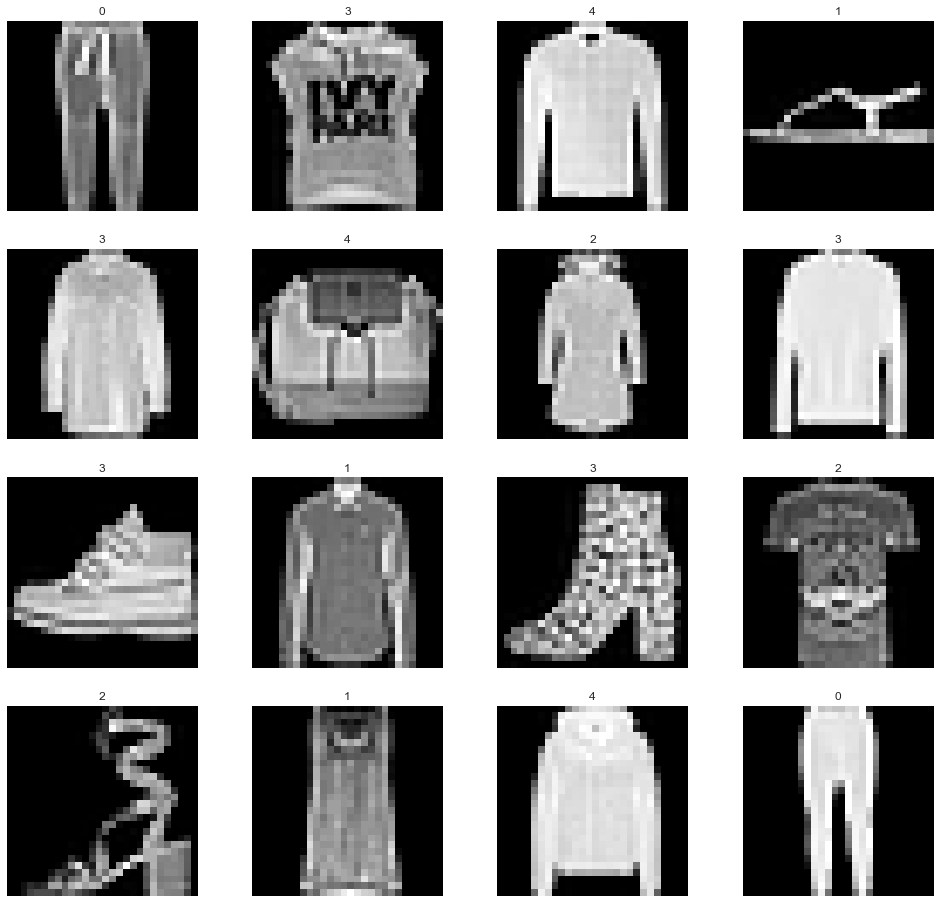

In [9]:
img=df.drop('Id', axis=1)
fig, axes = plt.subplots(4, 4, figsize = (15,15))
for row in axes:
    for axe in row:
        index = np.random.randint(60000)
        imge = img.drop('Label', axis=1).values[index].reshape(28,28)
        cloths = img['Label'][index]
        axe.imshow(imge, cmap='gray')
        axe.set_title(cloths)
        axe.set_axis_off()

## 2.2) Distribution of Labels

In [10]:
df['Label'].value_counts()

4    12067
2    11994
1    11986
3    11978
0    11975
Name: Label, dtype: int64

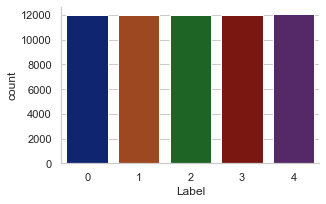

In [11]:
sns.factorplot(x='Label', data=df, kind='count', size=3, aspect= 1.5)

# 3) Data PreProcessing

## 3.1) Setting Random Seeds

In [12]:
# Setting Random Seeds for Reproducibilty.
seed = 66
np.random.seed(seed)

## 3.2) Splitting Data into Train and Validation Set

In [13]:
X = train.iloc[:,2:]
Y = train.iloc[:,1]
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.1, random_state=seed)

In [14]:
X.head()

,1,2,3,4,5,6,7,8,9,10,...,775,776,777,778,779,780,781,782,783,784
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,1,0,...,31,9,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [15]:
Y.head()

0    4
1    0
2    0
3    4
4    1
Name: Label, dtype: int64

## 3.3) Reshaping the Images

In [16]:
x_train = x_train.values.reshape((-1, 28, 28, 1))
x_test = x_test.values.reshape((-1, 28, 28, 1))

df_test.drop('Id' , axis=1, inplace=True)
df_test = df_test.values.reshape((-1, 28, 28, 1))

## 3.4)Normalization

In [17]:
x_train = x_train.astype("float32")/255
x_test = x_test.astype("float32")/255
df_test = df_test.astype("float32")/255

## 3.5) One Hot Encoding

In [18]:
y_train = to_categorical(y_train, num_classes=5)
y_test = to_categorical(y_test, num_classes=5)

In [19]:
print(y_train.shape)
print(y_test.shape)

(54000, 5)
(6000, 5)


# 4)Training a Convolutional Neural Network

## 4.1) Building a ConvNet

## Model1

In [76]:
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', strides=1, padding='same', 
                 data_format='channels_last', input_shape=(28,28,1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu', strides=1, padding='same', 
                 data_format='channels_last', input_shape=(28,28,1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu', strides=1, padding='same', 
                 data_format='channels_last', input_shape=(28,28,1)))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(5, activation='softmax'))
    

In [77]:
# Optimizer
optimizer = Adam(lr=0.001, beta_1=0.9, beta_2=0.999 )
model.compile(optimizer = optimizer, loss = 'categorical_crossentropy', metrics=['accuracy'])
model.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_16 (Conv2D)           (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 14, 14, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 7, 7, 64)          36928     
_________________________________________________________________
flatten_1 (Flatten)          (None, 3136)              0         
_________________________________________________________________
dense_8 (Dense)              (None, 64)                200768    
__________

In [78]:
reduce_lr = LearningRateScheduler(lambda x: 1e-3 * 0.9 ** x)

In [79]:
batch_size = 128
epochs = 40

In [80]:
# Fit the Model
history = model.fit(x_train, y_train,batch_size=128, epochs = epochs, verbose=2,
                              validation_data = (x_test, y_test),
                              callbacks = [reduce_lr])

Train on 54000 samples, validate on 6000 samples
Epoch 1/40
30s - loss: 0.6037 - acc: 0.7473 - val_loss: 0.4761 - val_acc: 0.8043
Epoch 2/40
30s - loss: 0.4154 - acc: 0.8324 - val_loss: 0.4008 - val_acc: 0.8385
Epoch 3/40
33s - loss: 0.3638 - acc: 0.8533 - val_loss: 0.3405 - val_acc: 0.8688
Epoch 4/40
31s - loss: 0.3285 - acc: 0.8705 - val_loss: 0.3809 - val_acc: 0.8478
Epoch 5/40
31s - loss: 0.3064 - acc: 0.8764 - val_loss: 0.3221 - val_acc: 0.8708
Epoch 6/40
31s - loss: 0.2848 - acc: 0.8869 - val_loss: 0.3066 - val_acc: 0.8810
Epoch 7/40
30s - loss: 0.2641 - acc: 0.8948 - val_loss: 0.2963 - val_acc: 0.8788
Epoch 8/40
30s - loss: 0.2554 - acc: 0.8975 - val_loss: 0.2825 - val_acc: 0.8902
Epoch 9/40
31s - loss: 0.2382 - acc: 0.9051 - val_loss: 0.2790 - val_acc: 0.8890
Epoch 10/40
31s - loss: 0.2267 - acc: 0.9097 - val_loss: 0.2800 - val_acc: 0.8875
Epoch 11/40
30s - loss: 0.2155 - acc: 0.9136 - val_loss: 0.2926 - val_acc: 0.8852
Epoch 12/40
31s - loss: 0.2048 - acc: 0.9188 - val_loss: 0

In [81]:
score = model.evaluate(x_test, y_test)

print('Loss: {:.4f}'.format(score[0]))
print('Accuracy: {:.4f}'.format(score[1]))

5824/6000 [============================>.] - ETA: 0sLoss: 0.2715
Accuracy: 0.9005


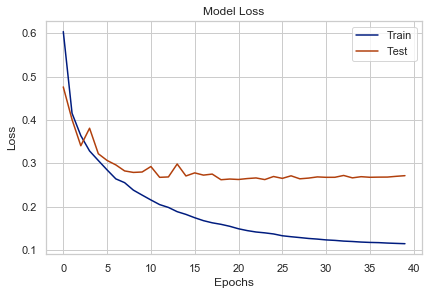

In [82]:
#Plotting the Training and Validation Curves
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("Model Loss")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Train', 'Test'])
plt.show()

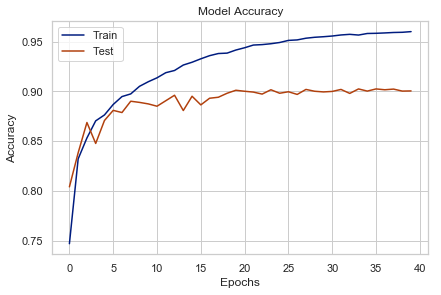

In [85]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title("Model Accuracy")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'])
plt.show()

In [86]:
#Confusion Matrix
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

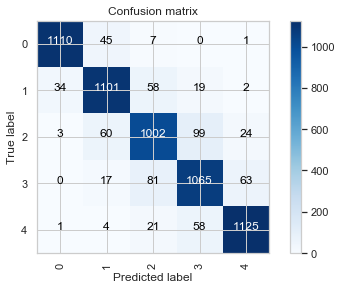

In [87]:
Y_pred = model.predict(x_test)
Y_pred_classes = np.argmax(Y_pred,axis = 1) 
Y_true = np.argmax(y_test,axis = 1)
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
plot_confusion_matrix(confusion_mtx, 
            classes = ['0','1','2','3','4'])

In [88]:
#Classification Report
classes = ['0','1','2','3','4']
print(classification_report(Y_true, Y_pred_classes, target_names = classes))

              precision    recall  f1-score   support

           0       0.97      0.95      0.96      1163
           1       0.90      0.91      0.90      1214
           2       0.86      0.84      0.85      1188
           3       0.86      0.87      0.86      1226
           4       0.93      0.93      0.93      1209

    accuracy                           0.90      6000
   macro avg       0.90      0.90      0.90      6000
weighted avg       0.90      0.90      0.90      6000



In [ ]:
X = df_test

In [193]:
Y = model.predict(X)

In [195]:
Y.shape

(10000, 5)

In [211]:
y= pd.DataFrame(Y)

In [226]:
y['max_value']=my_df.max(axis=1)
y['Id']=y.index
y['Label']=np.argmax(Y,axis=1)

In [232]:
y_pre=y[['Id','Label']]

In [233]:
y_pre

,Id,Label
0,0,4
1,1,4
2,2,1
3,3,1
4,4,0
...,...,...
9995,9995,1
9996,9996,1
9997,9997,3
9998,9998,2


In [236]:
compression_opts = dict(method='zip',archive_name='pre1.csv')
y_pre.to_csv('pre1.zip',index=False, compression=compression_opts)

## Model2

In [89]:
model2 = Sequential()
model2.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', strides=1, padding='same', 
                 data_format='channels_last', input_shape=(28,28,1)))
model2.add(MaxPooling2D(pool_size=(2,2)))

model2.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu', strides=1, padding='same', 
                 data_format='channels_last'))
model2.add(MaxPooling2D(pool_size=(2,2)))
model2.add(Dropout(0.25))
model2.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu', strides=1, padding='same', 
                 data_format='channels_last'))
 
model2.add(Dropout(0.25))
model2.add(Flatten())
model2.add(Dense(64, activation='relu'))
model2.add(Dense(5, activation='softmax'))

In [90]:
# Optimizer
optimizer = Adam(lr=0.001, beta_1=0.9, beta_2=0.999 )
model2.compile(optimizer = optimizer, loss = 'categorical_crossentropy', metrics=['accuracy'])
model2.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_19 (Conv2D)           (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 14, 14, 64)        18496     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 7, 7, 64)          36928     
_________________________________________________________________
dropout_4 (Dropout)          (None, 7, 7, 64)          0         
__________

In [91]:
reduce_lr = LearningRateScheduler(lambda x: 1e-3 * 0.9 ** x)

In [92]:
batch_size = 128
epochs = 40

In [94]:
# Fit the Model
history2 = model2.fit(x_train, y_train,batch_size=128, epochs = epochs, verbose=2,
                              validation_data = (x_test, y_test),
                              callbacks = [reduce_lr])

Train on 54000 samples, validate on 6000 samples
Epoch 1/40
33s - loss: 0.2804 - acc: 0.8861 - val_loss: 0.2968 - val_acc: 0.8812
Epoch 2/40
34s - loss: 0.2705 - acc: 0.8897 - val_loss: 0.2751 - val_acc: 0.8855
Epoch 3/40
34s - loss: 0.2581 - acc: 0.8952 - val_loss: 0.3113 - val_acc: 0.8682
Epoch 4/40
32s - loss: 0.2474 - acc: 0.9003 - val_loss: 0.2819 - val_acc: 0.8887
Epoch 5/40
32s - loss: 0.2387 - acc: 0.9017 - val_loss: 0.2715 - val_acc: 0.8915
Epoch 6/40
32s - loss: 0.2339 - acc: 0.9046 - val_loss: 0.2534 - val_acc: 0.8973
Epoch 7/40
32s - loss: 0.2233 - acc: 0.9103 - val_loss: 0.2489 - val_acc: 0.8997
Epoch 8/40
32s - loss: 0.2151 - acc: 0.9134 - val_loss: 0.2607 - val_acc: 0.8977
Epoch 9/40
34s - loss: 0.2140 - acc: 0.9140 - val_loss: 0.2469 - val_acc: 0.9033
Epoch 10/40
33s - loss: 0.2061 - acc: 0.9170 - val_loss: 0.2521 - val_acc: 0.8975
Epoch 11/40
32s - loss: 0.1998 - acc: 0.9198 - val_loss: 0.2625 - val_acc: 0.8895
Epoch 12/40
32s - loss: 0.2017 - acc: 0.9186 - val_loss: 0

In [95]:
score2 = model2.evaluate(x_test, y_test)

print('Loss: {:.4f}'.format(score2[0]))
print('Accuracy: {:.4f}'.format(score2[1]))

6000/6000 [==============================] - 1s     
Loss: 0.2357
Accuracy: 0.9088


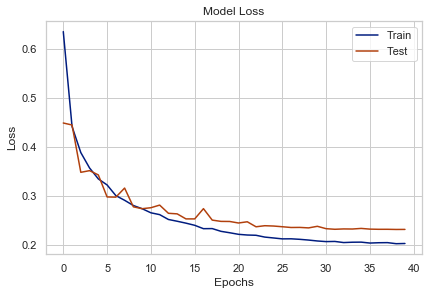

In [122]:
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title("Model Loss")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Train', 'Test'])
plt.show()

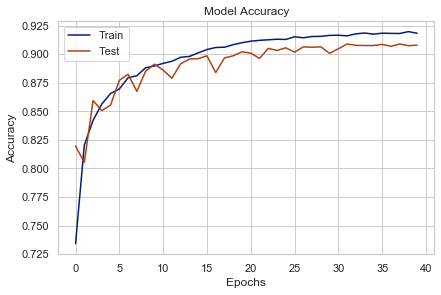

In [123]:
plt.plot(history2.history['accuracy'])
plt.plot(history2.history['val_accuracy'])
plt.title("Model Accuracy")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'])
plt.show()

In [124]:
#Confusion Matrix
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

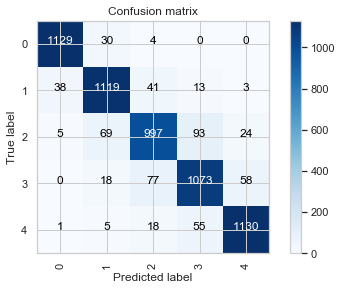

In [125]:
Y_pred = model2.predict(x_test)
Y_pred_classes = np.argmax(Y_pred,axis = 1) 
Y_true = np.argmax(y_test,axis = 1)
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
plot_confusion_matrix(confusion_mtx, 
            classes = ['0','1','2','3','4'])

In [126]:
#Classification Report
classes = ['0','1','2','3','4']
print(classification_report(Y_true, Y_pred_classes, target_names = classes))

              precision    recall  f1-score   support

           0       0.96      0.97      0.97      1163
           1       0.90      0.92      0.91      1214
           2       0.88      0.84      0.86      1188
           3       0.87      0.88      0.87      1226
           4       0.93      0.93      0.93      1209

    accuracy                           0.91      6000
   macro avg       0.91      0.91      0.91      6000
weighted avg       0.91      0.91      0.91      6000



In [116]:
X = df_test

In [117]:
Y2 = model2.predict(X)

In [118]:
Y2

array([[1.16870989e-14, 1.67716280e-05, 7.44712632e-03, 3.68634522e-01,
        6.23901606e-01],
       [1.07432936e-17, 7.90823101e-11, 2.90448843e-05, 3.11267236e-03,
        9.96858239e-01],
       [7.49512017e-01, 2.27319553e-01, 2.31646895e-02, 1.61781884e-06,
        2.16392732e-06],
       ...,
       [1.08320624e-08, 3.91655456e-04, 2.40793929e-01, 6.01451457e-01,
        1.57362953e-01],
       [1.88739359e-04, 1.30299613e-01, 8.65428150e-01, 4.08330560e-03,
        1.47050713e-07],
       [6.75671186e-10, 7.19887510e-07, 6.95657372e-01, 3.02657813e-01,
        1.68409455e-03]], dtype=float32)

In [119]:
Y2.shape

(10000, 5)

In [120]:
y2= pd.DataFrame(Y2)

In [121]:
y2

,0,1,2,3,4
0,1.168710e-14,1.677163e-05,0.007447,0.368635,6.239016e-01
1,1.074329e-17,7.908231e-11,0.000029,0.003113,9.968582e-01
2,7.495120e-01,2.273196e-01,0.023165,0.000002,2.163927e-06
3,9.602553e-05,9.480441e-01,0.049487,0.002373,1.778572e-07
4,4.383555e-01,4.468661e-01,0.090294,0.024381,1.033234e-04
...,...,...,...,...,...
9995,1.812617e-09,9.518108e-01,0.016042,0.032145,2.455315e-06
9996,4.456712e-06,9.999676e-01,0.000007,0.000021,6.776893e-08
9997,1.083206e-08,3.916555e-04,0.240794,0.601451,1.573630e-01
9998,1.887394e-04,1.302996e-01,0.865428,0.004083,1.470507e-07


In [122]:
y2['max_value']=y2.max(axis=1)
y2['Id']=y2.index
y2['Label']=np.argmax(Y2,axis=1)

In [123]:
y2

,0,1,2,3,4,max_value,Id,Label
0,1.168710e-14,1.677163e-05,0.007447,0.368635,6.239016e-01,0.623902,0,4
1,1.074329e-17,7.908231e-11,0.000029,0.003113,9.968582e-01,0.996858,1,4
2,7.495120e-01,2.273196e-01,0.023165,0.000002,2.163927e-06,0.749512,2,0
3,9.602553e-05,9.480441e-01,0.049487,0.002373,1.778572e-07,0.948044,3,1
4,4.383555e-01,4.468661e-01,0.090294,0.024381,1.033234e-04,0.446866,4,1
...,...,...,...,...,...,...,...,...
9995,1.812617e-09,9.518108e-01,0.016042,0.032145,2.455315e-06,0.951811,9995,1
9996,4.456712e-06,9.999676e-01,0.000007,0.000021,6.776893e-08,0.999968,9996,1
9997,1.083206e-08,3.916555e-04,0.240794,0.601451,1.573630e-01,0.601451,9997,3
9998,1.887394e-04,1.302996e-01,0.865428,0.004083,1.470507e-07,0.865428,9998,2


In [124]:
y2_pre=y2[['Id','Label']]

In [125]:
y2_pre

,Id,Label
0,0,4
1,1,4
2,2,0
3,3,1
4,4,1
...,...,...
9995,9995,1
9996,9996,1
9997,9997,3
9998,9998,2


In [126]:
compression_opts = dict(method='zip',archive_name='pre2.csv')
y2_pre.to_csv('pre2.zip',index=False, compression=compression_opts)

## Model3

In [96]:
model3 = Sequential()
model3.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu', strides=1, padding='same', 
                 data_format='channels_last', input_shape=(28,28,1)))
model3.add(MaxPooling2D(pool_size=(2,2)))
model3.add(Dropout(0.25))
model3.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu', strides=1, padding='same', 
                 data_format='channels_last'))
model3.add(MaxPooling2D(pool_size=(2,2)))
model3.add(Dropout(0.25))

model3.add(Flatten())
model3.add(Dense(128, activation='relu'))
model3.add(Dense(64, activation='relu'))
model3.add(Dense(5, activation='softmax'))

In [97]:
# Optimizer
optimizer = Adam(lr=0.001, beta_1=0.9, beta_2=0.999 )
model3.compile(optimizer = optimizer, loss = 'categorical_crossentropy', metrics=['accuracy'])
model3.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_22 (Conv2D)           (None, 28, 28, 64)        640       
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 14, 14, 128)       73856     
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 7, 7, 128)         0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 7, 7, 128)         0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 6272)              0         
__________

In [98]:
reduce_lr = LearningRateScheduler(lambda x: 1e-3 * 0.9 ** x)

In [99]:
batch_size = 128
epochs = 40

In [100]:
# Fit the Model
history3 = model3.fit(x_train, y_train,batch_size= batch_size, epochs = epochs, verbose=2,
                              validation_data = (x_test, y_test),
                              callbacks = [reduce_lr])

Train on 54000 samples, validate on 6000 samples
Epoch 1/40
70s - loss: 0.6189 - acc: 0.7386 - val_loss: 0.4501 - val_acc: 0.8217
Epoch 2/40
69s - loss: 0.4169 - acc: 0.8314 - val_loss: 0.3742 - val_acc: 0.8477
Epoch 3/40
71s - loss: 0.3651 - acc: 0.8504 - val_loss: 0.3474 - val_acc: 0.8623
Epoch 4/40
69s - loss: 0.3204 - acc: 0.8708 - val_loss: 0.3120 - val_acc: 0.8748
Epoch 5/40
70s - loss: 0.2917 - acc: 0.8831 - val_loss: 0.3431 - val_acc: 0.8647
Epoch 6/40
71s - loss: 0.2748 - acc: 0.8884 - val_loss: 0.3106 - val_acc: 0.8733
Epoch 7/40
70s - loss: 0.2618 - acc: 0.8931 - val_loss: 0.2855 - val_acc: 0.8892
Epoch 8/40
70s - loss: 0.2451 - acc: 0.9011 - val_loss: 0.2762 - val_acc: 0.8923
Epoch 9/40
70s - loss: 0.2328 - acc: 0.9073 - val_loss: 0.2569 - val_acc: 0.8978
Epoch 10/40
69s - loss: 0.2227 - acc: 0.9093 - val_loss: 0.2858 - val_acc: 0.8865
Epoch 11/40
71s - loss: 0.2140 - acc: 0.9131 - val_loss: 0.2725 - val_acc: 0.8913
Epoch 12/40
71s - loss: 0.2038 - acc: 0.9185 - val_loss: 0

In [ ]:
score3 = model3.evaluate(x_test, y_test)

print('Loss: {:.4f}'.format(score3[0]))
print('Accuracy: {:.4f}'.format(score3[1]))

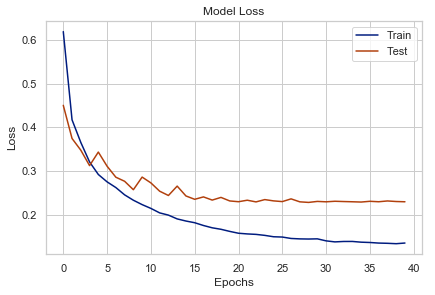

In [105]:
plt.plot(history3.history['loss'])
plt.plot(history3.history['val_loss'])
plt.title("Model Loss")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Train', 'Test'])
plt.show()

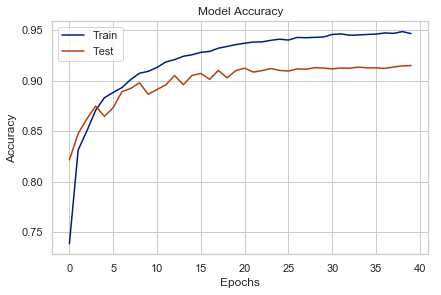

In [107]:
plt.plot(history3.history['acc'])
plt.plot(history3.history['val_acc'])
plt.title("Model Accuracy")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'])
plt.show()

In [101]:
#Confusion Matrix
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

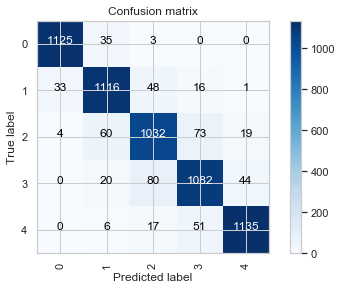

In [102]:
Y_pred = model3.predict(x_test)
Y_pred_classes = np.argmax(Y_pred,axis = 1) 
Y_true = np.argmax(y_test,axis = 1)
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
plot_confusion_matrix(confusion_mtx, 
            classes = ['0','1','2','3','4'])

In [103]:
#Classification Report
classes = ['0','1','2','3','4']
print(classification_report(Y_true, Y_pred_classes, target_names = classes))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97      1163
           1       0.90      0.92      0.91      1214
           2       0.87      0.87      0.87      1188
           3       0.89      0.88      0.88      1226
           4       0.95      0.94      0.94      1209

    accuracy                           0.92      6000
   macro avg       0.92      0.92      0.92      6000
weighted avg       0.92      0.92      0.91      6000



In [114]:
X = df_test

In [115]:
Y3 = model3.predict(X)

In [116]:
Y3.shape

(10000, 5)

In [117]:
y3= pd.DataFrame(Y3)

In [118]:
y3['max_value']=y3.max(axis=1)
y3['Id']=y3.index
y3['Label']=np.argmax(Y3,axis=1)

In [119]:
y3_pre=y3[['Id','Label']]

In [120]:
y3_pre

,Id,Label
0,0,4
1,1,4
2,2,0
3,3,1
4,4,0
...,...,...
9995,9995,1
9996,9996,1
9997,9997,3
9998,9998,2


In [121]:
compression_opts = dict(method='zip',archive_name='pre3.csv')
y3_pre.to_csv('pre3.zip',index=False, compression=compression_opts)

## Model4

In [24]:
model4 = Sequential()
model4.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu', strides=1, padding='same', 
                 data_format='channels_last', input_shape=(28,28,1)))
model4.add(MaxPooling2D(pool_size=(2,2)))
model4.add(Dropout(0.25))
model4.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu', strides=1, padding='same', 
                 data_format='channels_last'))
model4.add(BatchNormalization())
model4.add(MaxPooling2D(pool_size=(2,2)))
model4.add(Dropout(0.25))

model4.add(Flatten())
model4.add(Dense(128, activation='relu'))
model4.add(Dense(64, activation='relu'))
model4.add(Dense(5, activation='softmax'))

In [26]:
# Optimizer
optimizer = Adam(lr=0.001, beta_1=0.9, beta_2=0.999 )
model4.compile(optimizer = optimizer, loss = 'categorical_crossentropy', metrics=['accuracy'])
model4.summary()


Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 28, 28, 64)        640       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 14, 14, 128)       73856     
_________________________________________________________________
batch_normalization_3 (Batch (None, 14, 14, 128)       512       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 7, 7, 128)         0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 7, 7, 128)        

In [27]:
reduce_lr = LearningRateScheduler(lambda x: 1e-3 * 0.9 ** x)

In [28]:
batch_size = 128
epochs = 40

In [29]:
# Fit the Model
history4 = model4.fit(x_train, y_train,batch_size=128, epochs = epochs, verbose=2,
                              validation_data = (x_test, y_test),
                              callbacks = [reduce_lr])


Train on 54000 samples, validate on 6000 samples
Epoch 1/40
 - 100s - loss: 0.5255 - accuracy: 0.7861 - val_loss: 0.6603 - val_accuracy: 0.7652
Epoch 2/40
 - 106s - loss: 0.3579 - accuracy: 0.8544 - val_loss: 0.5036 - val_accuracy: 0.7900
Epoch 3/40
 - 112s - loss: 0.3199 - accuracy: 0.8697 - val_loss: 0.2854 - val_accuracy: 0.8872
Epoch 4/40
 - 131s - loss: 0.2796 - accuracy: 0.8861 - val_loss: 0.3882 - val_accuracy: 0.8377
Epoch 5/40
 - 120s - loss: 0.2631 - accuracy: 0.8928 - val_loss: 0.3160 - val_accuracy: 0.8782
Epoch 6/40
 - 119s - loss: 0.2470 - accuracy: 0.8981 - val_loss: 0.4089 - val_accuracy: 0.8378
Epoch 7/40
 - 118s - loss: 0.2254 - accuracy: 0.9082 - val_loss: 0.3385 - val_accuracy: 0.8642
Epoch 8/40
 - 119s - loss: 0.2111 - accuracy: 0.9145 - val_loss: 0.3773 - val_accuracy: 0.8583
Epoch 9/40
 - 118s - loss: 0.1943 - accuracy: 0.9209 - val_loss: 0.5274 - val_accuracy: 0.8225
Epoch 10/40
 - 118s - loss: 0.1808 - accuracy: 0.9263 - val_loss: 0.3102 - val_accuracy: 0.8868

In [30]:
score4 = model4.evaluate(x_test, y_test)

print('Loss: {:.4f}'.format(score4[0]))
print('Accuracy: {:.4f}'.format(score4[1]))

6000/6000 [==============================] - 4s 664us/step
Loss: 0.3065
Accuracy: 0.9050


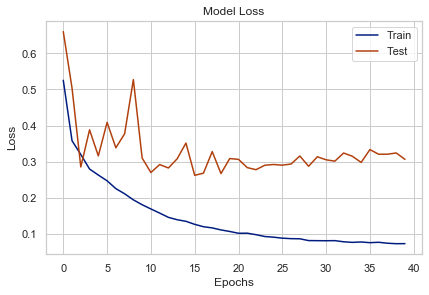

In [31]:
plt.plot(history4.history['loss'])
plt.plot(history4.history['val_loss'])
plt.title("Model Loss")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Train', 'Test'])
plt.show()

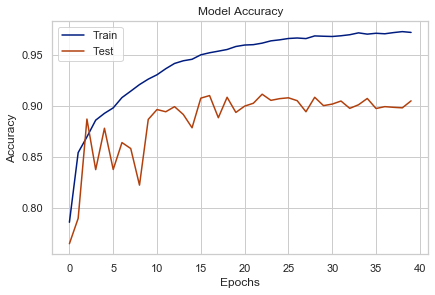

In [33]:
plt.plot(history4.history['accuracy'])
plt.plot(history4.history['val_accuracy'])
plt.title("Model Accuracy")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'])
plt.show()

In [34]:
#Confusion Matrix
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

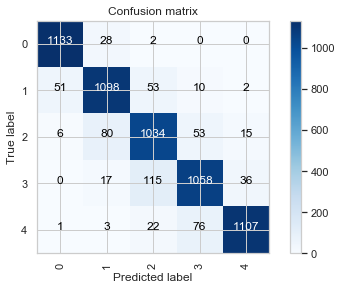

In [35]:
Y_pred = model4.predict(x_test)
Y_pred_classes = np.argmax(Y_pred,axis = 1) 
Y_true = np.argmax(y_test,axis = 1)
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
plot_confusion_matrix(confusion_mtx, 
            classes = ['0','1','2','3','4'])

In [124]:
#Classification Report
classes = ['0','1','2','3','4']
print(classification_report(Y_true, Y_pred_classes, target_names = classes))

              precision    recall  f1-score   support

           0       0.96      0.97      0.96      1163
           1       0.90      0.91      0.90      1214
           2       0.84      0.87      0.85      1188
           3       0.88      0.86      0.87      1226
           4       0.96      0.92      0.94      1209

    accuracy                           0.91      6000
   macro avg       0.91      0.91      0.91      6000
weighted avg       0.91      0.91      0.91      6000



In [51]:
X = df_test

In [52]:
Y4 = model4.predict(X)

In [53]:
y4= pd.DataFrame(Y4)

In [54]:
y4['max_value']=y4.max(axis=1)
y4['Id']=y4.index
y4['Label']=np.argmax(Y4,axis=1)

In [55]:
y4

,0,1,2,3,4,max_value,Id,Label
0,1.287049e-19,1.967306e-05,4.803787e-02,4.878747e-01,4.640678e-01,0.487875,0,3
1,1.626820e-21,1.866018e-15,3.679844e-08,6.778027e-05,9.999322e-01,0.999932,1,4
2,7.309293e-01,2.664520e-01,2.599185e-03,1.513503e-05,4.317736e-06,0.730929,2,0
3,1.162817e-06,9.508239e-01,4.862557e-02,5.493602e-04,5.593553e-08,0.950824,3,1
4,6.768192e-02,6.322693e-01,1.385255e-01,1.615059e-01,1.730961e-05,0.632269,4,1
...,...,...,...,...,...,...,...,...
9995,3.020803e-12,9.671233e-01,1.748622e-02,1.538939e-02,1.083396e-06,0.967123,9995,1
9996,6.083863e-10,9.999999e-01,3.319673e-09,6.377810e-08,2.386535e-15,1.000000,9996,1
9997,4.665429e-10,1.262553e-04,2.810459e-01,5.153025e-01,2.035253e-01,0.515303,9997,3
9998,3.210359e-05,2.823116e-01,7.171630e-01,4.932574e-04,3.419813e-08,0.717163,9998,2


In [56]:
y4_pre=y4[['Id','Label']]

In [57]:
compression_opts = dict(method='zip',archive_name='pre4.csv')
y4_pre.to_csv('pre4.zip',index=False, compression=compression_opts)